<a href="https://colab.research.google.com/github/Aadish1206/Codsoft/blob/main/Customer_Churn_Prediction_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [33]:
# Load the dataset
data_path = '/content/Churn_Modelling.csv'
churn_data = pd.read_csv(data_path)
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [34]:
# Drop irrelevant columns
churn_data_cleaned = churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [35]:
# Overview of data
churn_data_cleaned.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


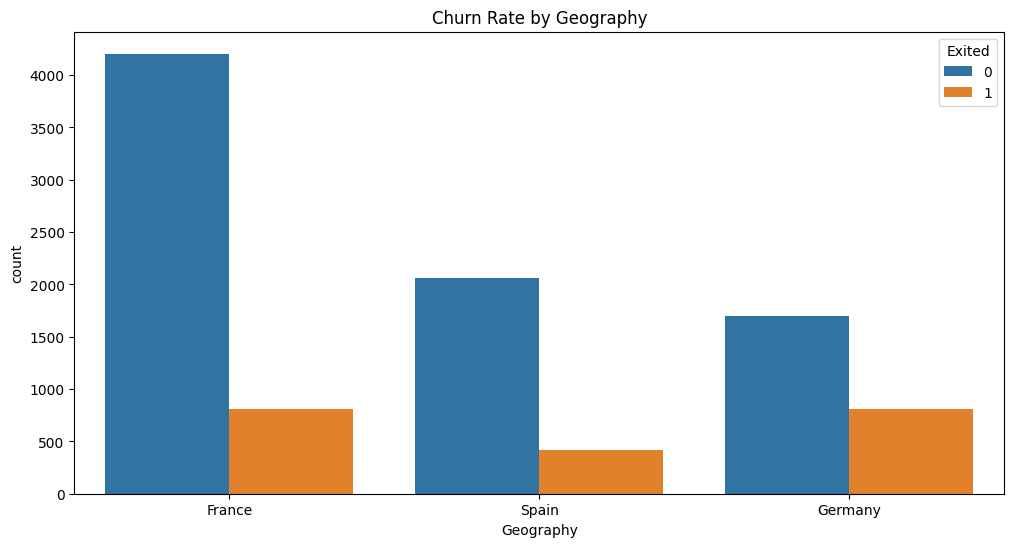

In [36]:
# Categorical data distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Geography', hue='Exited', data=churn_data_cleaned)
plt.title('Churn Rate by Geography')
plt.show()

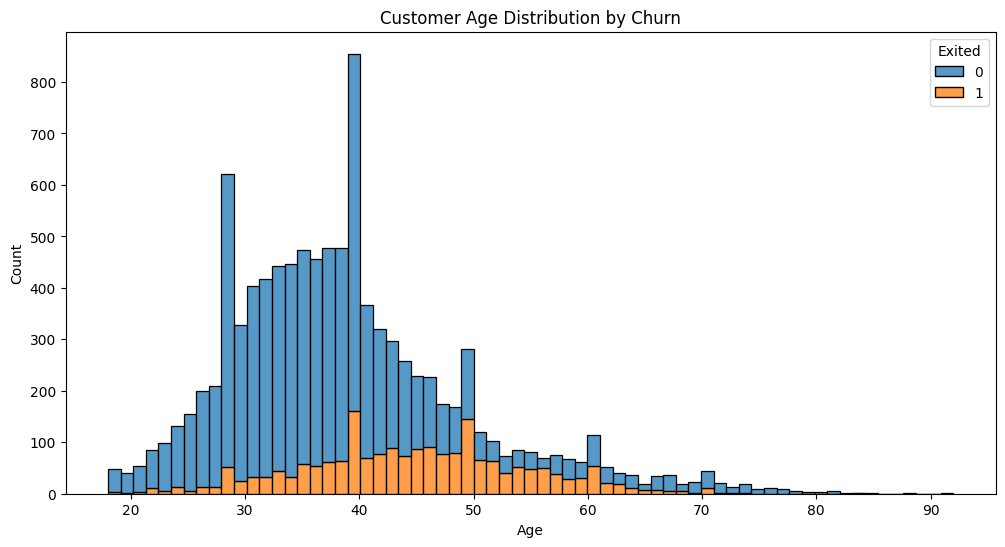

In [37]:
# Numerical data distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=churn_data_cleaned, x='Age', hue='Exited', multiple='stack')
plt.title('Customer Age Distribution by Churn')
plt.show()

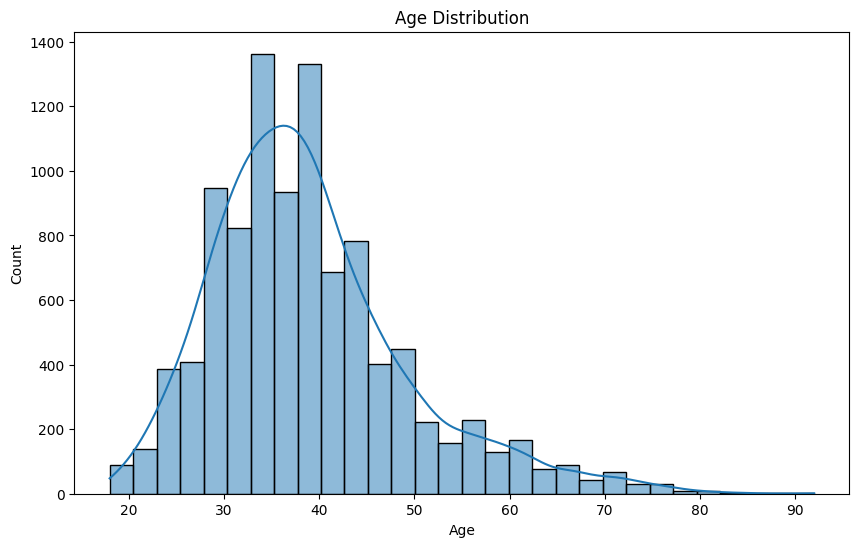

In [38]:
# Age distribution of customers
plt.figure(figsize=(10, 6))
sns.histplot(churn_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [39]:
# Defining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']),
        ('cat', OneHotEncoder(), ['Geography', 'Gender'])
    ]
)

In [40]:
# Model Training Setup
X = churn_data_cleaned.drop('Exited', axis=1)
y = churn_data_cleaned['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Train Logistic Regression Model
log_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
log_reg_pipeline.fit(X_train, y_train)
log_reg_predictions = log_reg_pipeline.predict(X_test)

In [42]:
# Train Random Forest Model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])
rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)

In [43]:
# Train Gradient Boosting Model
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GradientBoostingClassifier())])
gb_pipeline.fit(X_train, y_train)
gb_predictions = gb_pipeline.predict(X_test)

In [44]:
# Evaluation of Models
def evaluate_model(predictions, actual):
    accuracy = accuracy_score(actual, predictions)
    precision = precision_score(actual, predictions)
    recall = recall_score(actual, predictions)
    f1 = f1_score(actual, predictions)
    return accuracy, precision, recall, f1

log_reg_metrics = evaluate_model(log_reg_predictions, y_test)
rf_metrics = evaluate_model(rf_predictions, y_test)
gb_metrics = evaluate_model(gb_predictions, y_test)

print('Logistic Regression Metrics:', log_reg_metrics)
print('Random Forest Metrics:', rf_metrics)
print('Gradient Boosting Metrics:', gb_metrics)

Logistic Regression Metrics: (0.8035, 0.5, 0.13994910941475827, 0.2186878727634195)
Random Forest Metrics: (0.857, 0.7131474103585658, 0.455470737913486, 0.5559006211180124)
Gradient Boosting Metrics: (0.8555, 0.7148760330578512, 0.4402035623409669, 0.5448818897637796)


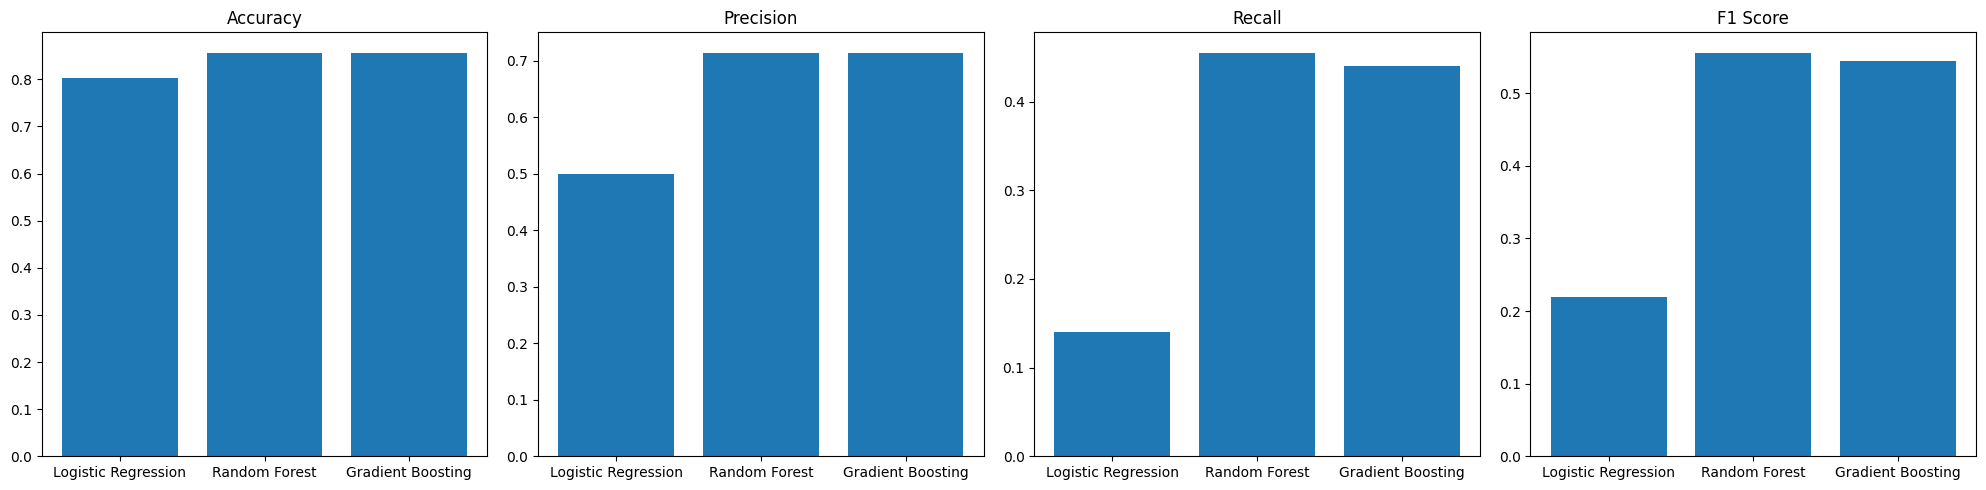

In [45]:
# Visualization of Model Performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results = {'Logistic Regression': log_reg_metrics, 'Random Forest': rf_metrics, 'Gradient Boosting': gb_metrics}
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, metric in enumerate(metrics):
    ax[i].bar(results.keys(), [result[i] for result in results.values()])
    ax[i].set_title(metric)
plt.tight_layout()
plt.show()

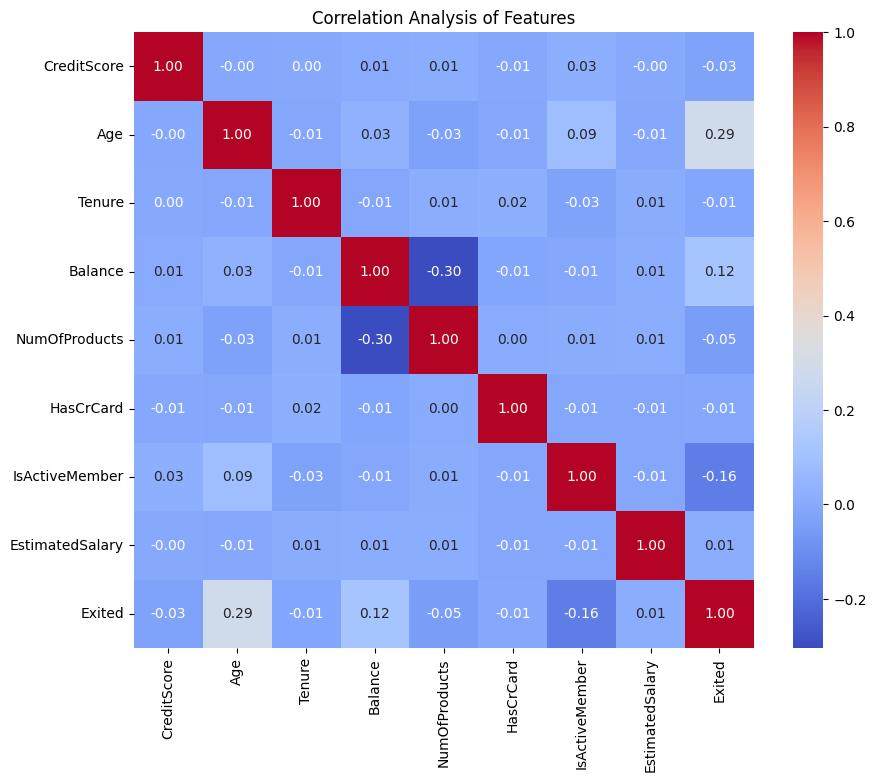

In [46]:
numerical_data = churn_data_cleaned.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Analysis of Features')
plt.show()


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train_transformed = preprocessor.fit_transform(X_train)


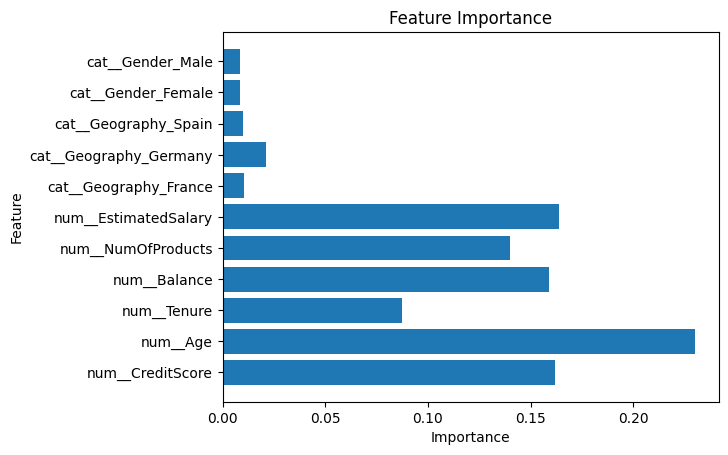

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train_transformed, y_train)

importances = rf_classifier.feature_importances_

feature_names = preprocessor.get_feature_names_out()

plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [49]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Average CV Score:', np.mean(cv_scores))

Cross-Validation Scores: [0.85125  0.839375 0.856875 0.84875  0.84375 ]
Average CV Score: 0.8480000000000001


In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train_transformed, y_train)



RandomForestClassifier(random_state=0)

In [51]:
new_data = {
    'CreditScore': [650],
    'Geography': ['France'],
    'Gender': ['Male'],
    'Age': [34],
    'Tenure': [5],
    'Balance': [50000],
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [70000]
}
new_data_df = pd.DataFrame(new_data)
preprocessed_new_data = preprocessor.transform(new_data_df)
predictions = model.predict(preprocessed_new_data)
print('Predictions for new data:', predictions)

Predictions for new data: [0]


In [52]:
new_data_churn_risk = {
    'CreditScore': [520],
    'Geography': ['Germany'],
    'Gender': ['Female'],
    'Age': [46],
    'Tenure': [1],
    'Balance': [120000],
    'NumOfProducts': [4],
    'HasCrCard': [0],
    'IsActiveMember': [0],
    'EstimatedSalary': [50000]
}

new_data_df_churn_risk = pd.DataFrame(new_data_churn_risk)

preprocessed_new_data_churn_risk = preprocessor.transform(new_data_df_churn_risk)

predictions_churn_risk = model.predict(preprocessed_new_data_churn_risk)
print('Predictions for high-risk churn data:', predictions_churn_risk)


Predictions for high-risk churn data: [1]
